# Sinusoids 

### George Tzanetakis, University of Victoria 

In this notebook we will explore sinusoids as basic abstract building blocks that can be used to analyze music. 


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import IPython.display as ipd

srate = 44100
duration = 5 
freq1 = 220 
amp = 0.5 

# create srate*duration time points 
t = np.linspace(0,duration,srate*duration)
# create a 220Hz sine wave at 44100 sampling and amplitude of 0.5 
data = amp * np.sin(2*np.pi*220*t);
# play back the audio 
ipd.Audio(data,rate=srate)




We can abstract the generation of a sine wave of a particular frequency and duration. By concatenating appropriate sine waves generated by our function we can generate a simple melody. 

In [3]:
# generate a sine wave with specified frequency, duration, sampling 
# rate and amplitude. You can modify to this to add an argument for phase 

def generate_sin(freq, duration, srate=44100.0, amp=1.0): 
    t = np.linspace(0,duration,int(srate*duration))
    data = amp * np.sin(2*np.pi*freq *t)
    return data

# similar function for generating a cosine wave 
def generate_cos(freq, duration, srate=44100.0, amp=1.0): 
    t = np.linspace(0,duration,int(srate*duration))
    data = amp * np.cos(2*np.pi*freq *t)
    return data

# the frequencies of 3 notes 
c_freq = 523.0 
d_freq = 587.0 
e_freq = 659.0 

# generate the sine waves
c_data = generate_sin(c_freq, 0.5, amp=2.0)
d_data = generate_sin(d_freq, 0.5, amp=2.0)
e_data = generate_sin(e_freq, 0.5, amp=2.0)

# a simple melody with 3 notes 
data = np.hstack([c_data, d_data, e_data, c_data, 
                  c_data, d_data, e_data, c_data])

ipd.Audio(data,rate=srate)


Let's see what happens if we play the sine waves simultanesouly 

In [4]:
data = np.vstack([c_data, d_data, e_data])
ipd.Audio(data,rate=srate)


What happens we change a little bit the frequencies ? When the frequencies are all multiples of the same underlying "fundamental" frequency the resulting sound is harmonic and to our ears sounds like a single fused sounds. It is much harder to hear the individual sine waves when they are harmonically related and played simultaneously. 

In [7]:
freq1 = 220.0 
freq2 = 440.0 
freq3 = 660.0 
freq4 = 880.0 

data_f1 = generate_sin(freq1, 0.5, amp=1.0)
data_f2 = generate_sin(freq2, 0.5, amp = 0.5)
data_f3 = generate_sin(freq3, 0.5, amp = 0.25)
data_f4 = generate_sin(freq4, 0.5, amp = 0.25)

data = np.hstack([data_f1, data_f2, data_f3, data_f4])
ipd.Audio(data,rate=srate)


Now let's hear them simultaneously 

In [8]:
data = np.vstack([data_f2, data_f3, data_f4])
ipd.Audio(data,rate=srate)

In [12]:
def peak_amplitude(data): 
    return np.max(data)

def rms_amplitude(data): 
    rms_sum = 0.0
    for i in range(0, len(data)): 
        rms_sum += (data[i] * data[i])
    rms_sum /= len(data)
    return np.sqrt(rms_sum) * np.sqrt(2.0)

def dot_amplitude(data1, data2): 
    dot_product = np.dot(data1, data2)
    return 2 * (dot_product / len(data1))

freq = 300
data = generate_sin(freq, 0.5, amp =4.0)
data_probe1 = generate_sin(freq, 0.5, amp = 1)
noise = np.random.normal(0,0.5,len(data))
data_corrupted = data + noise 

# output the amplitude estimates of the corrupted data using different 
# methods. Experiment with finding amplitude of sinusoids of known frequencies
# in mixtures as well as with noise. try to understand what happens when 
# the phase is changed 
(round(peak_amplitude(data_corrupted), 3), round(rms_amplitude(data_corrupted), 3), 
round(dot_amplitude(data_corrupted, data_probe1), 3))



(5.5819999999999999, 4.0620000000000003, 3.9990000000000001)

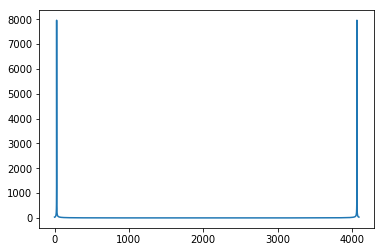

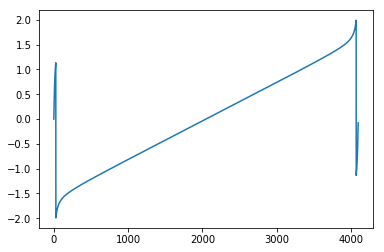

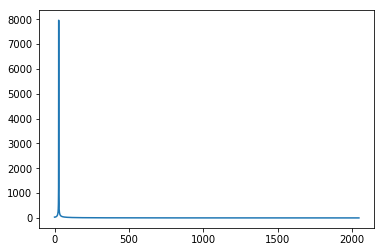

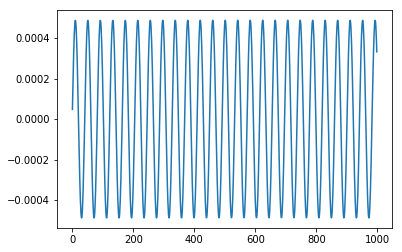

In [13]:
fft_size = 4096
complex_spectrum = np.fft.fft(data[0:fft_size])
magnitude_spectrum = np.abs(complex_spectrum)
phase_spectrum = np.angle(complex_spectrum)
plt.plot(magnitude_spectrum)
plt.figure()
plt.plot(phase_spectrum)
half_magnitude_spectrum = magnitude_spectrum[0: int(len(magnitude_spectrum)/2)]

plt.figure()
plt.plot(half_magnitude_spectrum)

magnitude_spectrum = np.zeros(len(magnitude_spectrum))
fft_bin = 100
magnitude_spectrum[fft_bin] = 1 
magnitude_spectrum[len(magnitude_spectrum)-fft_bin] = 1
real_spectrum = magnitude_spectrum * np.cos(phase_spectrum)
imag_spectrum = magnitude_spectrum * np.sin(phase_spectrum)

back_to_time_domain = np.fft.ifft(real_spectrum + 1j * imag_spectrum)
plt.figure()
plt.plot(np.real(back_to_time_domain[1:1000]))
#plt.plot(data[0:fft_size])

